In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import sys
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from skimage import io, color
from skimage.transform import resize

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Activation, Conv2D, Reshape, Add, Conv2DTranspose, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Training images shape: (536, 128, 128, 1)
Training masks shape: (536, 128, 128, 1)
Validation images shape: (134, 128, 128, 1)
Validation masks shape: (134, 128, 128, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │        128 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 128, 128,  │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │     36,928 │ activation_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ add_1[0][0]     

 Total params: 29,760,193 (113.53 MB)

 Trainable params: 29,740,993 (113.45 MB)

 Non-trainable params: 19,200 (75.00 KB)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6647 - accuracy_metric: 0.6648 - dice_coef: 0.3576 - iou_metric: 0.3412 - loss: 0.6894 - precision_metric: 0.3836 - recall_metric: 0.8217   
Epoch 1: val_loss improved from inf to 0.67464, saving model to hmsam_resunet_nuclei.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.6691 - accuracy_metric: 0.6691 - dice_coef: 0.3596 - iou_metric: 0.3446 - loss: 0.6826 - precision_metric: 0.3883 - recall_metric: 0.8205 - val_accuracy: 0.6194 - val_accuracy_metric: 0.6190 - val_dice_coef: 0.1934 - val_iou_metric: 0.1306 - val_loss: 0.6746 - val_precision_metric: 0.1521 - val_recall_metric: 0.4859
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.9451 - accuracy_metric: 0.9451 - dice_coef: 0.6104 - iou_metric: 0.6660 - loss: 0.1769 - precision_metric: 0.7880 - recall_metric: 0.8153
Epoch 2: val_loss improved from 0.67464 to 0.62342, saving model to hmsam_resunet_nuclei.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 39s 595ms/step - accuracy: 0.9452 - accuracy_metric: 0.9452 - dice_coef: 0.6116 - iou_metric: 0.6668 - loss: 0.1765 - precision_metric: 0.7888 - recall_metric: 0.8155 - val_accuracy: 0.8532 - val_accuracy_metric: 0.8558 - val_dice_coef: 0.1925 - val_iou_metric: 0.1120 - val_loss: 0.6234 - val_precision_metric: 0.3276 - val_recall_metric: 0.1519
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.9542 - accuracy_metric: 0.9542 - dice_coef: 0.6949 - iou_metric: 0.7085 - loss: 0.1324 - precision_metric: 0.8456 - recall_metric: 0.8128
Epoch 3: val_loss improved from 0.62342 to 0.45433, saving model to hmsam_resunet_nuclei.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 617ms/step - accuracy: 0.9541 - accuracy_metric: 0.9541 - dice_coef: 0.6950 - iou_metric: 0.7083 - loss: 0.1325 - precision_metric: 0.8454 - recall_metric: 0.8128 - val_accuracy: 0.8781 - val_accuracy_metric: 0.8799 - val_dice_coef: 0.1798 - val_iou_metric: 0.0012 - val_loss: 0.4543 - val_precision_metric: 0.1647 - val_recall_metric: 0.0012
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.9516 - accuracy_metric: 0.9516 - dice_coef: 0.7207 - iou_metric: 0.7131 - loss: 0.1305 - precision_metric: 0.8284 - recall_metric: 0.8382
Epoch 4: val_loss improved from 0.45433 to 0.37837, saving model to hmsam_resunet_nuclei.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 39s 560ms/step - accuracy: 0.9518 - accuracy_metric: 0.9517 - dice_coef: 0.7211 - iou_metric: 0.7137 - loss: 0.1301 - precision_metric: 0.8291 - recall_metric: 0.8385 - val_accuracy: 0.8790 - val_accuracy_metric: 0.8807 - val_dice_coef: 0.1738 - val_iou_metric: 6.2620e-04 - val_loss: 0.3784 - val_precision_metric: 0.1698 - val_recall_metric: 6.3159e-04
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.9609 - accuracy_metric: 0.9609 - dice_coef: 0.7721 - iou_metric: 0.7610 - loss: 0.1082 - precision_metric: 0.8607 - recall_metric: 0.8690
Epoch 5: val_loss did not improve from 0.37837
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 560ms/step - accuracy: 0.9609 - accuracy_metric: 0.9609 - dice_coef: 0.7720 - iou_metric: 0.7609 - loss: 0.1082 - precision_metric: 0.8608 - recall_metric: 0.8688 - val_accuracy: 0.8424 - val_accuracy_metric: 0.8455 - val_dice_coef: 0.1768 - val_iou_metric: 0.0336 - val_loss: 0.4253 - val_precision_metric: 0.1814 - val_recall_metric: 

34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 604ms/step - accuracy: 0.9636 - accuracy_metric: 0.9636 - dice_coef: 0.7978 - iou_metric: 0.7660 - loss: 0.0943 - precision_metric: 0.8663 - recall_metric: 0.8730 - val_accuracy: 0.8502 - val_accuracy_metric: 0.8528 - val_dice_coef: 0.4334 - val_iou_metric: 0.3609 - val_loss: 0.2939 - val_precision_metric: 0.4697 - val_recall_metric: 0.6608
Epoch 15/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.9687 - accuracy_metric: 0.9687 - dice_coef: 0.8201 - iou_metric: 0.7966 - loss: 0.0840 - precision_metric: 0.8917 - recall_metric: 0.8846
Epoch 15: val_loss improved from 0.29391 to 0.20542, saving model to hmsam_resunet_nuclei.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 599ms/step - accuracy: 0.9687 - accuracy_metric: 0.9687 - dice_coef: 0.8202 - iou_metric: 0.7967 - loss: 0.0840 - precision_metric: 0.8916 - recall_metric: 0.8847 - val_accuracy: 0.9097 - val_accuracy_metric: 0.9103 - val_dice_coef: 0.5242 - val_iou_metric: 0.4598 - val_loss: 0.2054 - val_precision_metric: 0.6739 - val_recall_metric: 0.6313
Epoch 16/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.9708 - accuracy_metric: 0.9708 - dice_coef: 0.8317 - iou_metric: 0.8052 - loss: 0.0764 - precision_metric: 0.8970 - recall_metric: 0.8892
Epoch 16: val_loss did not improve from 0.20542
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 526ms/step - accuracy: 0.9708 - accuracy_metric: 0.9708 - dice_coef: 0.8317 - iou_metric: 0.8052 - loss: 0.0765 - precision_metric: 0.8971 - recall_metric: 0.8891 - val_accuracy: 0.8906 - val_accuracy_metric: 0.8908 - val_dice_coef: 0.5596 - val_iou_metric: 0.4562 - val_loss: 0.2258 - val_precision_metric: 0.6171 - val_recall_metric: 0.7136

34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 567ms/step - accuracy: 0.9694 - accuracy_metric: 0.9695 - dice_coef: 0.8301 - iou_metric: 0.8019 - loss: 0.0782 - precision_metric: 0.8863 - recall_metric: 0.8947 - val_accuracy: 0.9399 - val_accuracy_metric: 0.9417 - val_dice_coef: 0.6056 - val_iou_metric: 0.5528 - val_loss: 0.2034 - val_precision_metric: 0.8542 - val_recall_metric: 0.6219
Epoch 18/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.9711 - accuracy_metric: 0.9711 - dice_coef: 0.8464 - iou_metric: 0.8176 - loss: 0.0734 - precision_metric: 0.9084 - recall_metric: 0.8924
Epoch 18: val_loss did not improve from 0.20338
34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 530ms/step - accuracy: 0.9711 - accuracy_metric: 0.9711 - dice_coef: 0.8463 - iou_metric: 0.8175 - loss: 0.0734 - precision_metric: 0.9082 - recall_metric: 0.8924 - val_accuracy: 0.9307 - val_accuracy_metric: 0.9321 - val_dice_coef: 0.6399 - val_iou_metric: 0.5539 - val_loss: 0.5397 - val_precision_metric: 0.7264 - val_recall_metric: 0.7120

34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 598ms/step - accuracy: 0.9684 - accuracy_metric: 0.9684 - dice_coef: 0.8353 - iou_metric: 0.8063 - loss: 0.0824 - precision_metric: 0.8990 - recall_metric: 0.8894 - val_accuracy: 0.9659 - val_accuracy_metric: 0.9662 - val_dice_coef: 0.7643 - val_iou_metric: 0.7539 - val_loss: 0.0932 - val_precision_metric: 0.8650 - val_recall_metric: 0.8556
Epoch 20/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.9724 - accuracy_metric: 0.9724 - dice_coef: 0.8341 - iou_metric: 0.8117 - loss: 0.0727 - precision_metric: 0.8890 - recall_metric: 0.9060
Epoch 20: val_loss improved from 0.09323 to 0.06568, saving model to hmsam_resunet_nuclei.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 567ms/step - accuracy: 0.9723 - accuracy_metric: 0.9723 - dice_coef: 0.8342 - iou_metric: 0.8117 - loss: 0.0728 - precision_metric: 0.8892 - recall_metric: 0.9058 - val_accuracy: 0.9749 - val_accuracy_metric: 0.9750 - val_dice_coef: 0.8168 - val_iou_metric: 0.8071 - val_loss: 0.0657 - val_precision_metric: 0.9057 - val_recall_metric: 0.8802

--- Evaluating the Model on Validation Set ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - accuracy: 0.9738 - accuracy_metric: 0.9739 - dice_coef: 0.8136 - iou_metric: 0.7992 - loss: 0.0674 - precision_metric: 0.8968 - recall_metric: 0.8801
Validation Loss: 0.0657
Validation Accuracy: 0.9749
Validation IoU: 0.8039
Validation Dice Coefficient: 0.8124
Validation Precision: 0.9053
Validation Recall: 0.8773
Validation Overall Accuracy: 0.9751

--- Visualizing Predictions on Validation Set ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━

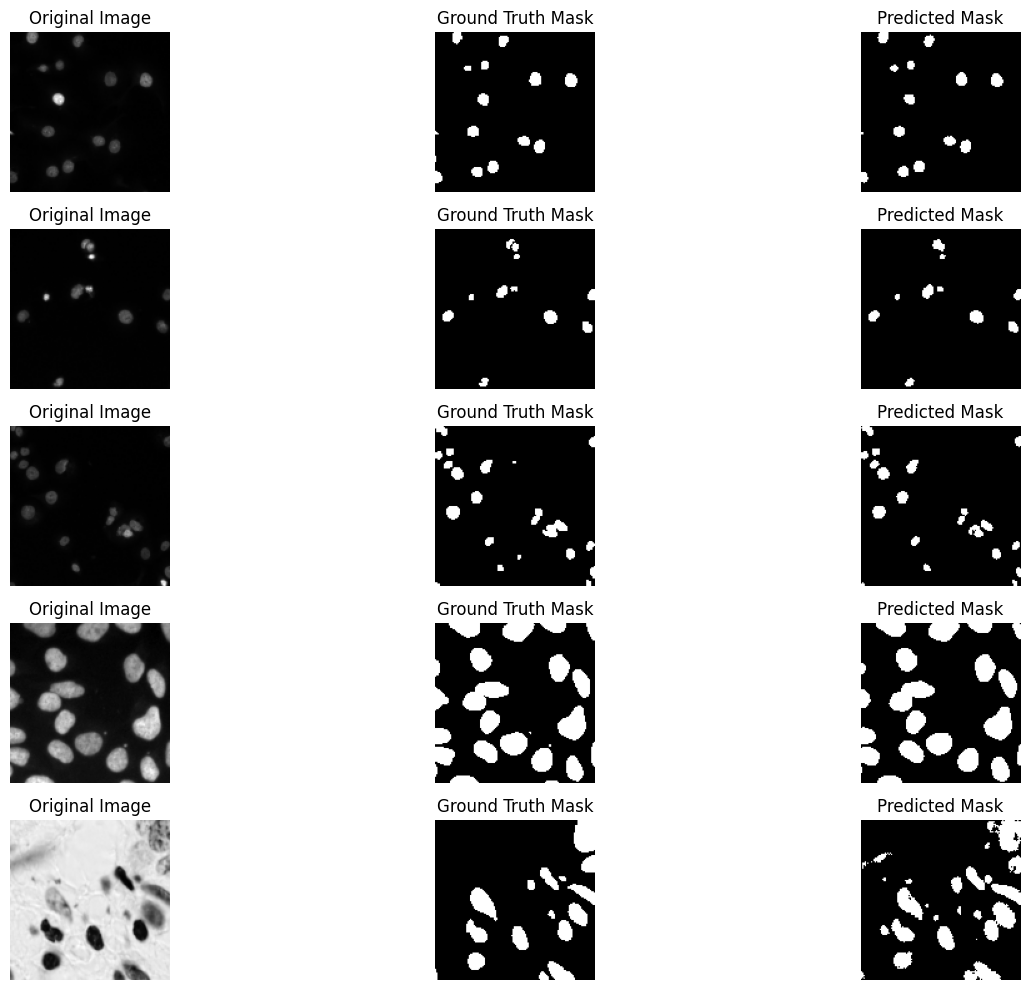

In [3]:
# --- Data Paths ---
DATA_DIR = '/content/drive/MyDrive' # Adjust this to your main dataset directory
TRAIN_IMG_DIR = '/content/drive/MyDrive/NucleiSegmentation/NucleiSegmentationDataset/all_images'
TRAIN_MASK_DIR = '/content/drive/MyDrive/NucleiSegmentation/NucleiSegmentationDataset/merged_masks'

# --- Parameters ---
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 1 # Assuming grayscale images after loading
NUM_CLASSES = 1 # Binary segmentation (nuclei vs. background)
BATCH_SIZE = 16
EPOCHS = 20
LEARNING_RATE = 1e-4
VALIDATION_SPLIT = 0.2 # Percentage of training data to use for validation

# --- Helper Functions ---
def load_data(img_dir, mask_dir, img_height, img_width, channels):
    images = []
    masks = []
    img_filenames = sorted(os.listdir(img_dir))
    mask_filenames = sorted(os.listdir(mask_dir))

    for img_file, mask_file in zip(img_filenames, mask_filenames):
        if not img_file.startswith('.') and not mask_file.startswith('.'):
            img_path = os.path.join(img_dir, img_file)
            mask_path = os.path.join(mask_dir, mask_file)

            img = io.imread(img_path)
            mask = io.imread(mask_path)

            if img.ndim == 3 and img.shape[2] == 4:
                img = img[:, :, :3]
            if img.ndim == 3:
                img = color.rgb2gray(img)

            if mask.ndim == 3 and mask.shape[2] == 4:
                mask = mask[:, :, :3]
            if mask.ndim == 3:
                mask = color.rgb2gray(mask)

            img_resized = resize(img, (img_width, img_height), anti_aliasing=True)
            mask_resized = resize(mask, (img_width, img_height), anti_aliasing=True)
            mask_binary = (mask_resized > 0.5).astype(np.float32)
            img_resized = np.expand_dims(img_resized, axis=-1).astype(np.float32)
            mask_binary = np.expand_dims(mask_binary, axis=-1)

            images.append(img_resized)
            masks.append(mask_binary)

    return np.array(images), np.array(masks)

# Load all training data
X, Y = load_data(TRAIN_IMG_DIR, TRAIN_MASK_DIR, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=VALIDATION_SPLIT, random_state=42)

print(f"Training images shape: {X_train.shape}")
print(f"Training masks shape: {Y_train.shape}")
print(f"Validation images shape: {X_val.shape}")
print(f"Validation masks shape: {Y_val.shape}")

# --- Hybrid Attention Module (HAM) in Keras ---
def channel_attention(input_feature, ratio=8):
    channel = input_feature.shape[-1]
    squeeze = tf.keras.layers.GlobalAveragePooling2D()(input_feature)
    excitation = tf.keras.layers.Dense(units=channel // ratio, activation='relu')(squeeze)
    excitation = tf.keras.layers.Dense(units=channel, activation='sigmoid')(excitation)
    excitation = tf.keras.layers.Reshape((1, 1, channel))(excitation)
    scaled_feature = tf.keras.layers.Multiply()([input_feature, excitation])
    return scaled_feature

def spatial_attention(input_feature):
    kernel_size = 3
    avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(kernel_size, kernel_size), strides=(1, 1), padding='same')(input_feature)
    max_pool = tf.keras.layers.MaxPooling2D(pool_size=(kernel_size, kernel_size), strides=(1, 1), padding='same')(input_feature)
    concat = tf.keras.layers.Concatenate(axis=-1)([avg_pool, max_pool])
    spatial = tf.keras.layers.Conv2D(filters=1, kernel_size=kernel_size, padding='same', activation='sigmoid', use_bias=False)(concat)
    scaled_feature = tf.keras.layers.Multiply()([input_feature, spatial])
    return scaled_feature

def hybrid_attention(input_feature):
    channel_refined = channel_attention(input_feature)
    spatial_refined = spatial_attention(input_feature)
    attention_out = tf.keras.layers.Multiply()([channel_refined, spatial_refined])
    return tf.keras.layers.Add()([input_feature, attention_out])

# --- Inception Module in Keras ---
def inception_module(input_tensor, out_channels_1x1, red_channels_3x3, out_channels_3x3, red_channels_5x5, out_channels_5x5, pool_proj):
    branch1 = Conv2D(out_channels_1x1, (1, 1), padding='same', activation='relu')(input_tensor)

    branch2 = Conv2D(red_channels_3x3, (1, 1), padding='same', activation='relu')(input_tensor)
    branch2 = Conv2D(out_channels_3x3, (3, 3), padding='same', activation='relu')(branch2)

    branch3 = Conv2D(red_channels_5x5, (1, 1), padding='same', activation='relu')(input_tensor)
    branch3 = Conv2D(out_channels_5x5, (5, 5), padding='same', activation='relu')(branch3)

    branch4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    branch4 = Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(branch4)

    output = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output

# --- HMSA Module in Keras ---
def hmsa_module(input_tensor, in_channels, out_channels_1x1, red_channels_3x3, out_channels_3x3, red_channels_5x5, out_channels_5x5, pool_proj):
    inception_out = inception_module(input_tensor, out_channels_1x1, red_channels_3x3, out_channels_3x3, red_channels_5x5, out_channels_5x5, pool_proj)
    attention_out = hybrid_attention(inception_out)
    inception_output_channels = out_channels_1x1 + out_channels_3x3 + out_channels_5x5 + pool_proj
    if inception_output_channels != in_channels:
        projection = Conv2D(in_channels, (1, 1), padding='same')(attention_out)
        hmsam_output = Add()([input_tensor, projection])
    else:
        hmsam_output = Add()([input_tensor, attention_out])
    return Activation('relu')(hmsam_output)

# --- Residual Block in Keras ---
def residual_block(input_tensor, filters, stride=1):
    conv1 = Conv2D(filters, (3, 3), padding='same', strides=stride)(input_tensor)
    bn1 = BatchNormalization()(conv1)
    relu1 = Activation('relu')(bn1)
    conv2 = Conv2D(filters, (3, 3), padding='same')(relu1)
    bn2 = BatchNormalization()(conv2)

    if stride != 1 or input_tensor.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), padding='same', strides=stride)(input_tensor)
        shortcut = BatchNormalization()(shortcut)
        merged = Add()([bn2, shortcut])
    else:
        merged = Add()([bn2, input_tensor])
    return Activation('relu')(merged)

# --- UpSample Layer in Keras ---
def upsample_block(input_tensor, filters):
    up = Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
    return up

# --- HMSAM-ResUNet Model in Keras ---
def hmsam_resunet(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), num_classes=NUM_CLASSES):
    inputs = Input(shape=input_shape)

    # Encoder
    enc1_res1 = residual_block(inputs, 64)
    enc1_res2 = residual_block(enc1_res1, 64)
    pool1 = MaxPooling2D((2, 2))(enc1_res2)

    enc2_res1 = residual_block(pool1, 128)
    enc2_res2 = residual_block(enc2_res1, 128)
    pool2 = MaxPooling2D((2, 2))(enc2_res2)

    enc3_res1 = residual_block(pool2, 256)
    enc3_res2 = residual_block(enc3_res1, 256)
    pool3 = MaxPooling2D((2, 2))(enc3_res2)

    enc4_res1 = residual_block(pool3, 512)
    enc4_res2 = residual_block(enc4_res1, 512)
    pool4 = MaxPooling2D((2, 2))(enc4_res2)

    # HMSA Bridge
    hmsa_out = hmsa_module(pool4, in_channels=512,
                                out_channels_1x1=128,
                                red_channels_3x3=96, out_channels_3x3=192,
                                red_channels_5x5=32, out_channels_5x5=64,
                                pool_proj=128)

    # Decoder
    up4 = upsample_block(hmsa_out, 512)
    concat4 = concatenate([up4, enc4_res2], axis=-1)
    dec4_res1 = residual_block(concat4, 512)
    dec4_res2 = residual_block(dec4_res1, 512)

    up3 = upsample_block(dec4_res2, 256)
    concat3 = concatenate([up3, enc3_res2], axis=-1)
    dec3_res1 = residual_block(concat3, 256)
    dec3_res2 = residual_block(dec3_res1, 256)

    up2 = upsample_block(dec3_res2, 128)
    concat2 = concatenate([up2, enc2_res2], axis=-1)
    dec2_res1 = residual_block(concat2, 128)
    dec2_res2 = residual_block(dec2_res1, 128)

    up1 = upsample_block(dec2_res2, 64)
    concat1 = concatenate([up1, enc1_res2], axis=-1)
    dec1_res1 = residual_block(concat1, 64)
    dec1_res2 = residual_block(dec1_res1, 64)

    outputs = Conv2D(num_classes, (1, 1), activation='sigmoid')(dec1_res2)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Instantiate the HMSAM-ResUNet model
model = hmsam_resunet(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), num_classes=NUM_CLASSES)

# --- Metrics ---
def iou_metric(y_true, y_pred):
    intersection = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    union = K.sum(K.round(K.clip(y_true, 0, 1))) + K.sum(K.round(K.clip(y_pred, 0, 1))) - intersection
    iou = K.mean((intersection + K.epsilon()) / (union + K.epsilon()))
    return iou

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

def precision_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = (true_positives + K.epsilon()) / (predicted_positives + K.epsilon())
    return precision

def recall_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    actual_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = (true_positives + K.epsilon()) / (actual_positives + K.epsilon())
    return recall

def accuracy_metric(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

# Compile the model with added metrics
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy',
              metrics=['accuracy', iou_metric, dice_coef, precision_metric, recall_metric, accuracy_metric])

model.summary()

# --- Callbacks ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('hmsam_resunet_nuclei.h5', monitor='val_loss', save_best_only=True, verbose=1)

# --- Train the Model ---
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[early_stopping, model_checkpoint])

# --- Evaluate the Model ---
print("\n--- Evaluating the Model on Validation Set ---")
loss, accuracy, iou, dice, precision, recall, overall_accuracy = model.evaluate(X_val, Y_val, verbose=1)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation IoU: {iou:.4f}")
print(f"Validation Dice Coefficient: {dice:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation Overall Accuracy: {overall_accuracy:.4f}")

# --- Visualize Predictions ---
print("\n--- Visualizing Predictions on Validation Set ---")
n_samples = 5
indices = np.random.choice(len(X_val), n_samples, replace=False)

plt.figure(figsize=(15, 10))
for i, index in enumerate(indices):
    img = X_val[index]
    mask = Y_val[index]
    pred_mask = model.predict(np.expand_dims(img, axis=0))[0]
    pred_mask = (pred_mask > 0.5).astype(np.uint8) # Threshold the prediction

    plt.subplot(n_samples, 3, i * 3 + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(n_samples, 3, i * 3 + 2)
    plt.imshow(mask.squeeze(), cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis('off')

    plt.subplot(n_samples, 3, i * 3 + 3)
    plt.imshow(pred_mask.squeeze(), cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

plt.tight_layout()
plt.show()

# --- Optional: Save the trained model ---
# model.save('hmsam_resunet_nuclei_trained.h5')
# print("Trained model saved as hmsam_resunet_nuclei_trained.h5")